In [9]:
import torch
import math
torch.set_grad_enabled(False)

In [10]:
#build networks combining fully connected layers, Tanh, and ReLU,
#run the forward and backward passes,
#optimize parameters with SGD for MSE.

In [39]:
def generate_set():
    training_set = torch.empty(1000,2).uniform_(0,1)  #x et y
    training_classes = torch.empty(1000)
    testing_set = torch.empty(1000,2).uniform_(0,1)  #x et y
    testing_classes = torch.empty(1000)

    r = torch.empty(1,1).fill_(1/(2*math.pi)).pow(1/2)

    for i in range (1000):
        if ((training_set[i] - torch.Tensor([0.5,0.5])).pow(2).sum()).pow(1/2).item() < r.item():
            training_classes[i] = 1
        else:
            training_classes[i] = 0

        if ((testing_set[i] - torch.Tensor([0.5,0.5])).pow(2).sum()).pow(1/2).item() < r.item():
            testing_classes[i] = 1
        else:
            testing_classes[i] = 0
    return training_set, training_classes, testing_set, testing_classes

In [40]:
training_set, training_classes, testing_set, testing_classes = generate_set()

tensor([0.9580, 0.8544]) tensor(0.)


tensor(515)
tensor(485)


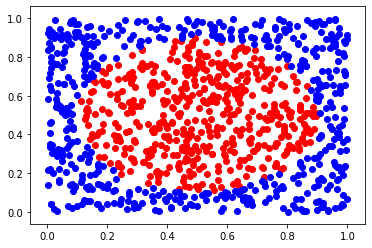

In [47]:
import matplotlib.pyplot as plt
plt.figure('1')
x = training_set[:,0]
y = training_set[:,1]
plt.scatter(x[training_classes==1], y[training_classes==1], color='r')
plt.scatter(x[training_classes==0], y[training_classes==0], color='b')

print(sum(training_classes==0))
print(sum(training_classes==1))
plt.show()

In [48]:
"""training_set = torch.empty(1000,2).uniform_(0,1)  #x et y
training_classes = torch.empty(1000,1)
testing_set = torch.empty(1000,2).uniform_(0,1)  #x et y
testing_classes = torch.empty(1000,1)

r = torch.empty(1,1).fill_(1/(2*math.pi)).pow(1/2)

for i in range (1000):
    if (training_set[i].pow(2).sum()).pow(1/2).item() < r.item():
        training_classes[i] = 1
    else:
        training_classes[i] = 0
    
    if (testing_set[i].pow(2).sum()).pow(1/2).item() < r.item():
        testing_classes[i] = 1
    else:
        testing_classes[i] = 0

#builds a network with two input units, two output units, three hidden layers of 25 units,
#trains it with MSE, logging the loss,
#computes and prints the ﬁnal train and the test errors."""

'training_set = torch.empty(1000,2).uniform_(0,1)  #x et y\ntraining_classes = torch.empty(1000,1)\ntesting_set = torch.empty(1000,2).uniform_(0,1)  #x et y\ntesting_classes = torch.empty(1000,1)\n\nr = torch.empty(1,1).fill_(1/(2*math.pi)).pow(1/2)\n\nfor i in range (1000):\n    if (training_set[i].pow(2).sum()).pow(1/2).item() < r.item():\n        training_classes[i] = 1\n    else:\n        training_classes[i] = 0\n    \n    if (testing_set[i].pow(2).sum()).pow(1/2).item() < r.item():\n        testing_classes[i] = 1\n    else:\n        testing_classes[i] = 0\n\n#builds a network with two input units, two output units, three hidden layers of 25 units,\n#trains it with MSE, logging the loss,\n#computes and prints the ﬁnal train and the test errors.'

# LINEAR

In [57]:
#LINEAR MODULE (FULLY CONNECTED LAYER)
#mini batch : x[mini_batch_size * D]D=2
class Linear(object):
    def __init__(self, in_feature, out_feature):
        k = math.sqrt(1/in_feature)
        self.weight = torch.empty(in_feature,out_feature).uniform_(-k,k)
        self.bias = torch.empty(out_feature).uniform_(-k,k)
        self.grad_weight = None
        self.grad_bias = None
    
    def forward(self , *input):
        if(isinstance(input, tuple)):
            liste = []
            for x in input[0]:
                liste.append(x.matmul(self.weight)+self.bias) 
            output = tuple(liste)
        else:
            output = input.matmul(self.weight)+self.bias
        return output
    
    def backward(self, *gradwrtoutput):
        derivative = []
        gradaccumulated = []
        for x in self.input:
            #derivative.append(1 - torch.tanh(x).pow(2))
            pass

        for i in range (len(derivative)):
            pass
            #gradaccumulated.append(derivative[i]*gradwrtoutput[i])
        output = tuple(gradaccumulated)
        return output 
        
    def param(self):
        output = [[self.weight, self.grad_weight], [self.bias, self.grad_bias]]
        return output
    
    #https://pytorch.org/docs/stable/nn.html#linear-layers

In [59]:
a = torch.empty(5,2).normal_()
print(a)
lin = Linear(2,1)
lin.forward(a)

tensor([[ 0.8532, -1.4399],
        [-1.6307, -1.1493],
        [-0.6215,  0.0036],
        [ 2.0450, -0.0496],
        [ 0.8590,  0.2480]])
torch.Size([2, 1])
(tensor([0.1777]), tensor([1.1727]), tensor([0.7148]), tensor([-0.3643]), tensor([0.1041]))


(tensor([0.1777]),
 tensor([1.1727]),
 tensor([0.7148]),
 tensor([-0.3643]),
 tensor([0.1041]))

# RELU (problème dérivée)

In [7]:
#RELU MODULE
class ReLU():
    def __init__(self):
        self.input = None
    
    def forward(self, *input): 
        liste = []
        self.input = input
        for x in input:
            liste.append(torch.max(x,torch.zeros_like(x))) 
        output = tuple(liste)
        return output
        
    def backward(self, *gradwrtoutput): #add input as param ?
        derivative = []
        gradaccumulated = []
        for x in self.input:
            dx = (x>=0).float()
            derivative.append(dx)
        for i in range (len(derivative)):
            gradaccumulated.append(derivative[i]*gradwrtoutput[i])
        output = tuple(gradaccumulated)
        return output   

    def param(self): 
        return []
    
#backward should get as input a tensor or a tuple of tensors containing the gradient of the 
#loss with respect to the module’s output, accumulate the gradient wrt the parameters, 
#and return a tensor or a tuple of tensors containing the gradient of the loss wrt the module’s input.

In [8]:
T = ReLU()
x = torch.empty(1,2).fill_(3)
y = torch.empty(1,2).fill_(-2)
grad1 = torch.empty(1,2).fill_(2)
grad2 = torch.empty(1,2).fill_(2)
print(x)
print(y)
print(grad1)
print(grad2)
t = T.forward(x, y)
print('ReLU of x, y')
print(t)
grad = T.backward(grad1,grad2)
print('grad')
print(grad)

tensor([[3., 3.]])
tensor([[-2., -2.]])
tensor([[2., 2.]])
tensor([[2., 2.]])
ReLU of x, y
(tensor([[3., 3.]]), tensor([[0., 0.]]))
xxxxxxx tensor([[3., 3.]])


RuntimeError: bool value of Tensor with more than one value is ambiguous

# TANH

In [35]:
#TANH MODULE
class Tanh():
    def __init__(self):
        self.input = None
        
    def forward(self, *input): 
        liste = []
        self.input = input
        for x in input:
            liste.append(torch.tanh(x)) 
        output = tuple(liste)
        return output
    
    def backward(self, *gradwrtoutput):
        derivative = []
        gradaccumulated = []
        for x in self.input:
            derivative.append(1 - torch.tanh(x).pow(2))

        for i in range (len(derivative)):
            gradaccumulated.append(derivative[i]*gradwrtoutput[i])
        output = tuple(gradaccumulated)
        return output   

    def param(self):
        return [] #Pas de param

In [36]:
T = Tanh()
x = torch.empty(1,2).fill_(1)
y = torch.empty(1,2).fill_(2)
grad1 = torch.empty(1,2).fill_(2)
grad2 = torch.empty(1,2).fill_(2)
print(x)
print(y)
print(grad1)
print(grad2)
t = T.forward(x, y)
print('tanh of x, y')
print(t)
grad = T.backward(grad1,grad2)
print('grad')
print(grad)

tensor([[1., 1.]])
tensor([[2., 2.]])
tensor([[2., 2.]])
tensor([[2., 2.]])
tanh of x, y
(tensor([[0.7616, 0.7616]]), tensor([[0.9640, 0.9640]]))
grad
(tensor([[0.8399, 0.8399]]), tensor([[0.1413, 0.1413]]))


# LOSSMSE (normalement juste, toujours à la fin)

In [88]:
#LOSSMSE MODULE
#Maybe: convert to list/tensor the tuple
    
class LossMSE():
    def __init__(self):
        self.loss = None
        self.gradloss = None
    
    def forward(self, *input, target): #Si plusieurs input et target comment on fait?
        liste = torch.Tensor([])
        for i in range (len(input)):
            liste = torch.cat((liste,(input[i]-target[i]).pow(2)))
        sum = torch.sum(liste)
        self.loss = sum/len(input)
        return self.loss
        
    def backward(self, *input, target):
        gradaccumulated = []
        liste = torch.Tensor([])
        for i,x in enumerate(input):
            liste = torch.cat((liste, 2*(x - target[i])/len(input)))
            #gradaccumulated.append(2*((x).pow(1/2))) #on obtient 2*(sqrt((x-target).pow(2))) du coup 2*(x-target)
        #output = tuple(gradaccumulated)      
        #self.gradloss = output
        self.gradloss = liste
        return self.gradloss

    def param(self):
        return [] #No param

In [92]:
N = LossMSE()
x = torch.empty(1,2).fill_(1)
y = torch.empty(1,2).fill_(2)
print("input", x, y)
t = torch.empty(1,2).fill_(-1)
t2 = torch.empty(1,2).fill_(-1)
print("target", t, t2)
l = N.forward(x, y , target= [t, t2])
print('loss', l)
dl = N.backward(x, y, target=[t, t2])
print('dloss', dl)

input tensor([[1., 1.]]) tensor([[2., 2.]])
target tensor([[-1., -1.]]) tensor([[-1., -1.]])
loss tensor(13.)
dloss tensor([[2., 2.],
        [3., 3.]])


# SEQUENTIAL

In [ ]:
#SEQUENTIAL MODULE (to combine several modules in basic sequential structure)
class Sequential(object):
    def forward(self , *input):
        raise NotImplementedError
    def backward(self , *gradwrtoutput):
        raise NotImplementedError
    def param(self): 
        return []
    
#forward should get for input, and returns, a tensor or a tuple of tensors.

#backward should get as input a tensor or a tuple of tensors containing the gradient of the 
#loss with respect to the module’s output, accumulate the gradient wrt the parameters, 
#and return a tensor or a tuple of tensors containing the gradient of the loss wrt the module’s input.

#param should return a list of pairs, each composed of a parameter tensor, and a gradient tensor of same size. 
#This list should be empty for parameterless modules (e.g. ReLU).
#Some modules may requires additional methods, and some modules may keep track of information from the forward 
#pass to be used in the backward.